In [6]:
# Go through the PreprocessingGlassDataset.ipynb first to understand dataset analysis processes

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from collections             import Counter

In [14]:
def outlierDetect(df,no_of_feature_contains = 3):
    '''pass pandas"s dataframe'''
    outlier_indices = []
    for col in df:
        q1 = np.percentile(df[col],25)
        q3 = np.percentile(df[col],75)
        # IQR
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_index = df[ (df[col] < lower) | (df[col] > upper)].index.tolist()
        outlier_indices.extend(outlier_index)

    counted_outliers = Counter(outlier_indices)    
    indexs = [k for k,v in counted_outliers.items() if v > no_of_feature_contains] 
    return indexs

In [30]:
def loaddata():
    raw_data = pd.read_csv('../../DataSets/glass.csv')
    X = raw_data.iloc[:,:-1]
    y = raw_data.iloc[:,-1]
    X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size = 0.3, 
                                                       random_state=42,
                                                       shuffle=True,
                                                       stratify=y)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)  
    X_test  = sc.transform(X_test)
    outlier_index = outlierDetect(pd.DataFrame(X_train))  
    X_train = np.delete(X_train , outlier_index , axis=0)
    y_train = np.array(y_train)
    y_train = np.delete( y_train , outlier_index)
    return np.array(X_train) , np.array(X_test) , np.array(y_train) , np.array(y_test)

In [31]:
X_train , X_test , y_train , y_test = loaddata()

# Here, we use Logistic regression to classify this dataset using Gradient Decent with Momentum

softmax function: $$P\left(y^{(i)}=k | x^{(i)} ; \theta\right)=\frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}$$



$$\nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^{m}\left[x^{(i)}\left(1\left\{y^{(i)}=k\right\}-P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right)\right]$$

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [151]:
class LogisticRegression():
    
    def __init__(self):
        pass
    
    def fit(self, X, y, learning_rate = 0.01, beta = 0.9, epochs = 1000, epsilon = 0.00001):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.beta          = beta
        self.labelcount    = len(np.unique(y))
        self.featurecount  = X.shape[1]
        self.obsercount    = X.shape[0] 
        self.epochs        = epochs
        self.epsilon       = epsilon
        self.itera         = []   
        self.fc            = []
        
        self.theta0  = np.random.randn(1 , self.labelcount)  # 1 * no. of labels 1 theta for each class
        self.theta   = np.random.randn(self.featurecount, self.labelcount)  # features * labels 
        
        self.expavg0 = np.random.randn(self.featurecount, self.labelcount)
        self.expavg  = np.random.randn(1 , self.labelcount)
        self.y       = self.one_hot_encode(self.y)
        self.gradient_decent_with_momentum()
        
    def softmax(self, X , bias = 0):
        exp      = np.exp(self.theta0 + np.dot(X,self.theta))
        sum_deno = np.sum(exp,axis=1)
        s        = list(map(lambda i : exp[:,i] / sum_deno ,  np.arange(self.labelcount)))
        return np.array(s).T
    
    def one_hot_encode(self,y):
        return np.array(pd.get_dummies(y))
    
    def cost_function(self,X,y):
        return (-1/self.obsercount) * np.sum(np.matmul(np.log(self.softmax(X)).T  , y ))

    def gradient_decent_with_momentum(self):
        
        i = 1
        while i<self.epochs:
        
            del_theta0 = (1/self.obsercount) * np.sum(self.softmax(self.X) - self.y , axis=0)
            del_theta  = (1/self.obsercount) * np.sum(np.matmul(self.X.T, (self.softmax(self.X) - self.y)))
    
            self.expavg  = (self.beta * self.expavg) + ((1 - self.beta) * del_theta)
            self.expavg0 = (self.beta * self.expavg) + ((1 - self.beta) * del_theta0)
        
            initial_cost = self.cost_function(self.X,self.y)

            self.theta   = self.theta  - (self.learning_rate * self.expavg)
            self.theta0  = self.theta0 - (self.learning_rate * self.expavg0)

            final_cost   = self.cost_function(self.X,self.y)

            print('{} Average Negative Log : {}'.format(i , final_cost))
            i+=1
            self.itera.append(i)
            self.fc.append(final_cost)
            
        
    def showgraph(self):
            plt.plot(self.itera , self.fc)
            plt.show()
            
    def score(self,X,y):
        y = self.one_hot_encode(y)
        temp = np.argmax(self.softmax(X),axis=1)
        c = 0
        for j,i in enumerate(np.argmax(y , axis=1)):
            if i == temp[j]:
                c+=1
        return (c/X.shape[0])*100

In [163]:
lr = LogisticRegression()
lr.fit(X_train , y_train , epochs=10000 , beta=.9 , learning_rate= 0.01)    

1 Average Negative Log : 21.07250940438413
2 Average Negative Log : 21.085939050737775
3 Average Negative Log : 21.098209500014782
4 Average Negative Log : 21.10939949427103
5 Average Negative Log : 21.11958750351903
6 Average Negative Log : 21.12885015016188
7 Average Negative Log : 21.137261142384972
8 Average Negative Log : 21.144890584833483
9 Average Negative Log : 21.151804567650032
10 Average Negative Log : 21.158064959408
11 Average Negative Log : 21.163729347828454
12 Average Negative Log : 21.168851085994536
13 Average Negative Log : 21.173479412229476
14 Average Negative Log : 21.17765961972967
15 Average Negative Log : 21.181433258067994
16 Average Negative Log : 21.1848383532682
17 Average Negative Log : 21.187909636644953
18 Average Negative Log : 21.190678775266274
19 Average Negative Log : 21.193174598921168
20 Average Negative Log : 21.19542332001448
21 Average Negative Log : 21.19744874397604
22 Average Negative Log : 21.19927246864847
23 Average Negative Log : 21.200

371 Average Negative Log : 21.208879811937194
372 Average Negative Log : 21.208861941336966
373 Average Negative Log : 21.208844084851474
374 Average Negative Log : 21.20882624247316
375 Average Negative Log : 21.20880841419451
376 Average Negative Log : 21.208790600007955
377 Average Negative Log : 21.208772799905983
378 Average Negative Log : 21.20875501388105
379 Average Negative Log : 21.20873724192564
380 Average Negative Log : 21.208719484032223
381 Average Negative Log : 21.208701740193273
382 Average Negative Log : 21.20868401040128
383 Average Negative Log : 21.208666294648737
384 Average Negative Log : 21.208648592928114
385 Average Negative Log : 21.20863090523192
386 Average Negative Log : 21.20861323155265
387 Average Negative Log : 21.208595571882793
388 Average Negative Log : 21.208577926214854
389 Average Negative Log : 21.208560294541346
390 Average Negative Log : 21.20854267685478
391 Average Negative Log : 21.208525073147648
392 Average Negative Log : 21.208507483412

719 Average Negative Log : 21.203462496276934
720 Average Negative Log : 21.203449104838366
721 Average Negative Log : 21.20343572508507
722 Average Negative Log : 21.203422357010616
723 Average Negative Log : 21.203409000608577
724 Average Negative Log : 21.203395655872527
725 Average Negative Log : 21.203382322796063
726 Average Negative Log : 21.203369001372753
727 Average Negative Log : 21.20335569159618
728 Average Negative Log : 21.203342393459945
729 Average Negative Log : 21.203329106957625
730 Average Negative Log : 21.20331583208284
731 Average Negative Log : 21.20330256882917
732 Average Negative Log : 21.203289317190215
733 Average Negative Log : 21.203276077159593
734 Average Negative Log : 21.2032628487309
735 Average Negative Log : 21.203249631897755
736 Average Negative Log : 21.20323642665377
737 Average Negative Log : 21.20322323299256
738 Average Negative Log : 21.203210050907742
739 Average Negative Log : 21.203196880392944
740 Average Negative Log : 21.203183721441

1051 Average Negative Log : 21.199621248405524
1052 Average Negative Log : 21.19961140149274
1053 Average Negative Log : 21.199601564295726
1054 Average Negative Log : 21.19959173680906
1055 Average Negative Log : 21.19958191902727
1056 Average Negative Log : 21.199572110944924
1057 Average Negative Log : 21.199562312556594
1058 Average Negative Log : 21.199552523856834
1059 Average Negative Log : 21.19954274484022
1060 Average Negative Log : 21.199532975501317
1061 Average Negative Log : 21.199523215834702
1062 Average Negative Log : 21.199513465834958
1063 Average Negative Log : 21.19950372549666
1064 Average Negative Log : 21.19949399481438
1065 Average Negative Log : 21.199484273782723
1066 Average Negative Log : 21.199474562396258
1067 Average Negative Log : 21.199464860649588
1068 Average Negative Log : 21.1994551685373
1069 Average Negative Log : 21.199445486053996
1070 Average Negative Log : 21.199435813194278
1071 Average Negative Log : 21.199426149952735
1072 Average Negative

1398 Average Negative Log : 21.196751676219673
1399 Average Negative Log : 21.196744892910736
1400 Average Negative Log : 21.19673811759307
1401 Average Negative Log : 21.19673135026218
1402 Average Negative Log : 21.196724590913558
1403 Average Negative Log : 21.196717839542707
1404 Average Negative Log : 21.19671109614512
1405 Average Negative Log : 21.1967043607163
1406 Average Negative Log : 21.19669763325176
1407 Average Negative Log : 21.19669091374701
1408 Average Negative Log : 21.19668420219756
1409 Average Negative Log : 21.196677498598927
1410 Average Negative Log : 21.196670802946617
1411 Average Negative Log : 21.196664115236167
1412 Average Negative Log : 21.196657435463088
1413 Average Negative Log : 21.196650763622912
1414 Average Negative Log : 21.19664409971116
1415 Average Negative Log : 21.196637443723365
1416 Average Negative Log : 21.19663079565506
1417 Average Negative Log : 21.196624155501766
1418 Average Negative Log : 21.196617523259047
1419 Average Negative L

1575 Average Negative Log : 21.19567150933471
1576 Average Negative Log : 21.195666072608116
1577 Average Negative Log : 21.1956606431147
1578 Average Negative Log : 21.195655220850394
1579 Average Negative Log : 21.195649805811144
1580 Average Negative Log : 21.195644397992893
1581 Average Negative Log : 21.195638997391583
1582 Average Negative Log : 21.195633604003163
1583 Average Negative Log : 21.195628217823586
1584 Average Negative Log : 21.1956228388488
1585 Average Negative Log : 21.195617467074765
1586 Average Negative Log : 21.195612102497442
1587 Average Negative Log : 21.195606745112787
1588 Average Negative Log : 21.195601394916764
1589 Average Negative Log : 21.195596051905337
1590 Average Negative Log : 21.19559071607448
1591 Average Negative Log : 21.19558538742015
1592 Average Negative Log : 21.195580065938337
1593 Average Negative Log : 21.195574751625
1594 Average Negative Log : 21.19556944447612
1595 Average Negative Log : 21.195564144487687
1596 Average Negative Lo

1758 Average Negative Log : 21.194793070991423
1759 Average Negative Log : 21.19478889272141
1760 Average Negative Log : 21.194784720981257
1761 Average Negative Log : 21.194780555767363
1762 Average Negative Log : 21.194776397076083
1763 Average Negative Log : 21.194772244903803
1764 Average Negative Log : 21.194768099246907
1765 Average Negative Log : 21.194763960101767
1766 Average Negative Log : 21.19475982746478
1767 Average Negative Log : 21.194755701332323
1768 Average Negative Log : 21.194751581700796
1769 Average Negative Log : 21.194747468566582
1770 Average Negative Log : 21.194743361926083
1771 Average Negative Log : 21.194739261775684
1772 Average Negative Log : 21.194735168111798
1773 Average Negative Log : 21.194731080930815
1774 Average Negative Log : 21.194727000229143
1775 Average Negative Log : 21.194722926003188
1776 Average Negative Log : 21.194718858249352
1777 Average Negative Log : 21.19471479696406
1778 Average Negative Log : 21.1947107421437
1779 Average Negat

2072 Average Negative Log : 21.19378434345939
2073 Average Negative Log : 21.193782048860076
2074 Average Negative Log : 21.193779759761576
2075 Average Negative Log : 21.19377747616094
2076 Average Negative Log : 21.193775198055242
2077 Average Negative Log : 21.19377292544155
2078 Average Negative Log : 21.19377065831693
2079 Average Negative Log : 21.19376839667845
2080 Average Negative Log : 21.193766140523188
2081 Average Negative Log : 21.19376388984821
2082 Average Negative Log : 21.193761644650607
2083 Average Negative Log : 21.193759404927444
2084 Average Negative Log : 21.19375717067581
2085 Average Negative Log : 21.19375494189279
2086 Average Negative Log : 21.19375271857546
2087 Average Negative Log : 21.193750500720906
2088 Average Negative Log : 21.193748288326233
2089 Average Negative Log : 21.193746081388525
2090 Average Negative Log : 21.19374387990487
2091 Average Negative Log : 21.19374168387236
2092 Average Negative Log : 21.193739493288106
2093 Average Negative Lo

2418 Average Negative Log : 21.193299815466503
2419 Average Negative Log : 21.193299262637247
2420 Average Negative Log : 21.193298714411725
2421 Average Negative Log : 21.19329817078768
2422 Average Negative Log : 21.193297631762857
2423 Average Negative Log : 21.193297097335
2424 Average Negative Log : 21.19329656750185
2425 Average Negative Log : 21.193296042261167
2426 Average Negative Log : 21.19329552161068
2427 Average Negative Log : 21.19329500554815
2428 Average Negative Log : 21.193294494071335
2429 Average Negative Log : 21.193293987177984
2430 Average Negative Log : 21.19329348486586
2431 Average Negative Log : 21.193292987132715
2432 Average Negative Log : 21.193292493976315
2433 Average Negative Log : 21.19329200539442
2434 Average Negative Log : 21.193291521384793
2435 Average Negative Log : 21.1932910419452
2436 Average Negative Log : 21.193290567073415
2437 Average Negative Log : 21.193290096767207
2438 Average Negative Log : 21.193289631024335
2439 Average Negative Lo

2726 Average Negative Log : 21.193336964829072
2727 Average Negative Log : 21.193337731752838
2728 Average Negative Log : 21.193338502668198
2729 Average Negative Log : 21.193339277573436
2730 Average Negative Log : 21.193340056466827
2731 Average Negative Log : 21.193340839346654
2732 Average Negative Log : 21.193341626211197
2733 Average Negative Log : 21.193342417058734
2734 Average Negative Log : 21.19334321188756
2735 Average Negative Log : 21.193344010695952
2736 Average Negative Log : 21.19334481348219
2737 Average Negative Log : 21.193345620244585
2738 Average Negative Log : 21.19334643098141
2739 Average Negative Log : 21.19334724569097
2740 Average Negative Log : 21.19334806437154
2741 Average Negative Log : 21.193348887021436
2742 Average Negative Log : 21.19334971363895
2743 Average Negative Log : 21.193350544222376
2744 Average Negative Log : 21.19335137877001
2745 Average Negative Log : 21.193352217280168
2746 Average Negative Log : 21.19335305975115
2747 Average Negative

3078 Average Negative Log : 21.193842086050456
3079 Average Negative Log : 21.193844162943996
3080 Average Negative Log : 21.19384624331911
3081 Average Negative Log : 21.19384832717462
3082 Average Negative Log : 21.19385041450932
3083 Average Negative Log : 21.193852505322063
3084 Average Negative Log : 21.19385459961163
3085 Average Negative Log : 21.193856697376873
3086 Average Negative Log : 21.193858798616596
3087 Average Negative Log : 21.193860903329632
3088 Average Negative Log : 21.193863011514797
3089 Average Negative Log : 21.19386512317092
3090 Average Negative Log : 21.19386723829684
3091 Average Negative Log : 21.19386935689137
3092 Average Negative Log : 21.193871478953348
3093 Average Negative Log : 21.19387360448161
3094 Average Negative Log : 21.19387573347498
3095 Average Negative Log : 21.193877865932294
3096 Average Negative Log : 21.193880001852403
3097 Average Negative Log : 21.193882141234127
3098 Average Negative Log : 21.19388428407631
3099 Average Negative L

3274 Average Negative Log : 21.19431430924637
3275 Average Negative Log : 21.19431704760851
3276 Average Negative Log : 21.19431978924647
3277 Average Negative Log : 21.194322534159333
3278 Average Negative Log : 21.194325282346178
3279 Average Negative Log : 21.194328033806105
3280 Average Negative Log : 21.19433078853818
3281 Average Negative Log : 21.194333546541515
3282 Average Negative Log : 21.194336307815178
3283 Average Negative Log : 21.19433907235828
3284 Average Negative Log : 21.19434184016989
3285 Average Negative Log : 21.19434461124912
3286 Average Negative Log : 21.194347385595062
3287 Average Negative Log : 21.194350163206817
3288 Average Negative Log : 21.194352944083466
3289 Average Negative Log : 21.19435572822412
3290 Average Negative Log : 21.19435851562788
3291 Average Negative Log : 21.194361306293843
3292 Average Negative Log : 21.19436410022111
3293 Average Negative Log : 21.19436689740879
3294 Average Negative Log : 21.19436969785599
3295 Average Negative Log

3626 Average Negative Log : 21.195474773529142
3627 Average Negative Log : 21.195478617459262
3628 Average Negative Log : 21.19548246441964
3629 Average Negative Log : 21.1954863144098
3630 Average Negative Log : 21.195490167429245
3631 Average Negative Log : 21.195494023477487
3632 Average Negative Log : 21.195497882554047
3633 Average Negative Log : 21.195501744658447
3634 Average Negative Log : 21.1955056097902
3635 Average Negative Log : 21.19550947794882
3636 Average Negative Log : 21.195513349133822
3637 Average Negative Log : 21.19551722334474
3638 Average Negative Log : 21.195521100581097
3639 Average Negative Log : 21.195524980842393
3640 Average Negative Log : 21.195528864128175
3641 Average Negative Log : 21.195532750437962
3642 Average Negative Log : 21.195536639771287
3643 Average Negative Log : 21.195540532127662
3644 Average Negative Log : 21.195544427506633
3645 Average Negative Log : 21.195548325907712
3646 Average Negative Log : 21.19555222733044
3647 Average Negative

3977 Average Negative Log : 21.197007316010563
3978 Average Negative Log : 21.197012201302453
3979 Average Negative Log : 21.197017089518784
3980 Average Negative Log : 21.197021980659436
3981 Average Negative Log : 21.197026874724287
3982 Average Negative Log : 21.197031771713206
3983 Average Negative Log : 21.197036671626083
3984 Average Negative Log : 21.197041574462794
3985 Average Negative Log : 21.197046480223218
3986 Average Negative Log : 21.197051388907244
3987 Average Negative Log : 21.197056300514742
3988 Average Negative Log : 21.19706121504561
3989 Average Negative Log : 21.197066132499724
3990 Average Negative Log : 21.197071052876975
3991 Average Negative Log : 21.197075976177246
3992 Average Negative Log : 21.197080902400426
3993 Average Negative Log : 21.197085831546406
3994 Average Negative Log : 21.197090763615066
3995 Average Negative Log : 21.197095698606308
3996 Average Negative Log : 21.197100636520023
3997 Average Negative Log : 21.197105577356094
3998 Average N

4325 Average Negative Log : 21.19888366253863
4326 Average Negative Log : 21.198889564440552
4327 Average Negative Log : 21.198895469278348
4328 Average Negative Log : 21.198901377052188
4329 Average Negative Log : 21.19890728776226
4330 Average Negative Log : 21.198913201408743
4331 Average Negative Log : 21.198919117991835
4332 Average Negative Log : 21.198925037511696
4333 Average Negative Log : 21.198930959968543
4334 Average Negative Log : 21.19893688536254
4335 Average Negative Log : 21.19894281369387
4336 Average Negative Log : 21.198948744962735
4337 Average Negative Log : 21.19895467916931
4338 Average Negative Log : 21.198960616313794
4339 Average Negative Log : 21.198966556396385
4340 Average Negative Log : 21.19897249941726
4341 Average Negative Log : 21.198978445376618
4342 Average Negative Log : 21.19898439427464
4343 Average Negative Log : 21.198990346111533
4344 Average Negative Log : 21.198996300887483
4345 Average Negative Log : 21.199002258602686
4346 Average Negativ

4501 Average Negative Log : 21.19996780201443
4502 Average Negative Log : 21.19997422412124
4503 Average Negative Log : 21.199980649207795
4504 Average Negative Log : 21.199987077274415
4505 Average Negative Log : 21.19999350832142
4506 Average Negative Log : 21.19999994234912
4507 Average Negative Log : 21.20000637935784
4508 Average Negative Log : 21.200012819347894
4509 Average Negative Log : 21.200019262319614
4510 Average Negative Log : 21.200025708273298
4511 Average Negative Log : 21.20003215720928
4512 Average Negative Log : 21.200038609127887
4513 Average Negative Log : 21.200045064029432
4514 Average Negative Log : 21.200051521914247
4515 Average Negative Log : 21.200057982782646
4516 Average Negative Log : 21.200064446634965
4517 Average Negative Log : 21.20007091347151
4518 Average Negative Log : 21.200077383292633
4519 Average Negative Log : 21.200083856098644
4520 Average Negative Log : 21.20009033188987
4521 Average Negative Log : 21.20009681066665
4522 Average Negative 

4678 Average Negative Log : 21.201151242843924
4679 Average Negative Log : 21.201158197934443
4680 Average Negative Log : 21.201165156071625
4681 Average Negative Log : 21.201172117255922
4682 Average Negative Log : 21.20117908148777
4683 Average Negative Log : 21.201186048767607
4684 Average Negative Log : 21.20119301909587
4685 Average Negative Log : 21.201199992473008
4686 Average Negative Log : 21.201206968899456
4687 Average Negative Log : 21.201213948375663
4688 Average Negative Log : 21.201220930902068
4689 Average Negative Log : 21.20122791647912
4690 Average Negative Log : 21.201234905107256
4691 Average Negative Log : 21.20124189678693
4692 Average Negative Log : 21.201248891518578
4693 Average Negative Log : 21.20125588930267
4694 Average Negative Log : 21.201262890139617
4695 Average Negative Log : 21.201269894029892
4696 Average Negative Log : 21.201276900973944
4697 Average Negative Log : 21.201283910972215
4698 Average Negative Log : 21.20129092402515
4699 Average Negati

4983 Average Negative Log : 21.20341606953885
4984 Average Negative Log : 21.203423977170132
4985 Average Negative Log : 21.20343188801082
4986 Average Negative Log : 21.20343980206153
4987 Average Negative Log : 21.203447719322902
4988 Average Negative Log : 21.203455639795536
4989 Average Negative Log : 21.203463563480074
4990 Average Negative Log : 21.20347149037713
4991 Average Negative Log : 21.20347942048734
4992 Average Negative Log : 21.203487353811326
4993 Average Negative Log : 21.203495290349714
4994 Average Negative Log : 21.203503230103134
4995 Average Negative Log : 21.203511173072208
4996 Average Negative Log : 21.203519119257578
4997 Average Negative Log : 21.20352706865986
4998 Average Negative Log : 21.203535021279688
4999 Average Negative Log : 21.203542977117696
5000 Average Negative Log : 21.20355093617451
5001 Average Negative Log : 21.20355889845076
5002 Average Negative Log : 21.203566863947085
5003 Average Negative Log : 21.203574832664117
5004 Average Negative

5284 Average Negative Log : 21.205944152974556
5285 Average Negative Log : 21.205953057133563
5286 Average Negative Log : 21.205961964712866
5287 Average Negative Log : 21.205970875713216
5288 Average Negative Log : 21.205979790135398
5289 Average Negative Log : 21.205988707980197
5290 Average Negative Log : 21.205997629248373
5291 Average Negative Log : 21.20600655394071
5292 Average Negative Log : 21.206015482057982
5293 Average Negative Log : 21.206024413600957
5294 Average Negative Log : 21.206033348570422
5295 Average Negative Log : 21.206042286967147
5296 Average Negative Log : 21.20605122879192
5297 Average Negative Log : 21.206060174045508
5298 Average Negative Log : 21.206069122728696
5299 Average Negative Log : 21.206078074842257
5300 Average Negative Log : 21.206087030386975
5301 Average Negative Log : 21.20609598936363
5302 Average Negative Log : 21.206104951773007
5303 Average Negative Log : 21.20611391761587
5304 Average Negative Log : 21.206122886893016
5305 Average Nega

5629 Average Negative Log : 21.209224544303876
5630 Average Negative Log : 21.209234677235536
5631 Average Negative Log : 21.20924481387896
5632 Average Negative Log : 21.20925495423506
5633 Average Negative Log : 21.209265098304748
5634 Average Negative Log : 21.209275246088925
5635 Average Negative Log : 21.20928539758851
5636 Average Negative Log : 21.20929555280441
5637 Average Negative Log : 21.209305711737546
5638 Average Negative Log : 21.20931587438883
5639 Average Negative Log : 21.209326040759162
5640 Average Negative Log : 21.209336210849475
5641 Average Negative Log : 21.209346384660666
5642 Average Negative Log : 21.209356562193662
5643 Average Negative Log : 21.209366743449365
5644 Average Negative Log : 21.2093769284287
5645 Average Negative Log : 21.209387117132575
5646 Average Negative Log : 21.209397309561908
5647 Average Negative Log : 21.209407505717614
5648 Average Negative Log : 21.20941770560061
5649 Average Negative Log : 21.20942790921182
5650 Average Negative 

5819 Average Negative Log : 21.211217488305397
5820 Average Negative Log : 21.211228343197135
5821 Average Negative Log : 21.21123920197956
5822 Average Negative Log : 21.21125006465364
5823 Average Negative Log : 21.211260931220345
5824 Average Negative Log : 21.21127180168065
5825 Average Negative Log : 21.211282676035523
5826 Average Negative Log : 21.21129355428594
5827 Average Negative Log : 21.211304436432876
5828 Average Negative Log : 21.211315322477304
5829 Average Negative Log : 21.21132621242018
5830 Average Negative Log : 21.2113371062625
5831 Average Negative Log : 21.211348004005238
5832 Average Negative Log : 21.211358905649348
5833 Average Negative Log : 21.21136981119583
5834 Average Negative Log : 21.211380720645636
5835 Average Negative Log : 21.211391633999753
5836 Average Negative Log : 21.211402551259155
5837 Average Negative Log : 21.21141347242482
5838 Average Negative Log : 21.211424397497716
5839 Average Negative Log : 21.211435326478835
5840 Average Negative 

5999 Average Negative Log : 21.213234988248068
6000 Average Negative Log : 21.21324655938102
6001 Average Negative Log : 21.213258134583974
6002 Average Negative Log : 21.21326971385795
6003 Average Negative Log : 21.21328129720398
6004 Average Negative Log : 21.213292884623073
6005 Average Negative Log : 21.21330447611625
6006 Average Negative Log : 21.21331607168454
6007 Average Negative Log : 21.213327671328955
6008 Average Negative Log : 21.21333927505052
6009 Average Negative Log : 21.21335088285026
6010 Average Negative Log : 21.213362494729193
6011 Average Negative Log : 21.21337411068834
6012 Average Negative Log : 21.213385730728728
6013 Average Negative Log : 21.213397354851377
6014 Average Negative Log : 21.213408983057306
6015 Average Negative Log : 21.21342061534754
6016 Average Negative Log : 21.21343225172311
6017 Average Negative Log : 21.213443892185037
6018 Average Negative Log : 21.213455536734337
6019 Average Negative Log : 21.21346718537204
6020 Average Negative Lo

6348 Average Negative Log : 21.21752777175492
6349 Average Negative Log : 21.217540826832394
6350 Average Negative Log : 21.217553886349027
6351 Average Negative Log : 21.21756695030591
6352 Average Negative Log : 21.217580018704112
6353 Average Negative Log : 21.21759309154475
6354 Average Negative Log : 21.217606168828905
6355 Average Negative Log : 21.217619250557668
6356 Average Negative Log : 21.217632336732137
6357 Average Negative Log : 21.21764542735339
6358 Average Negative Log : 21.21765852242253
6359 Average Negative Log : 21.217671621940642
6360 Average Negative Log : 21.217684725908835
6361 Average Negative Log : 21.217697834328174
6362 Average Negative Log : 21.217710947199777
6363 Average Negative Log : 21.21772406452472
6364 Average Negative Log : 21.217737186304106
6365 Average Negative Log : 21.21775031253902
6366 Average Negative Log : 21.217763443230567
6367 Average Negative Log : 21.217776578379823
6368 Average Negative Log : 21.2177897179879
6369 Average Negative 

6530 Average Negative Log : 21.219977997906096
6531 Average Negative Log : 21.219991879025127
6532 Average Negative Log : 21.22000576478427
6533 Average Negative Log : 21.220019655184633
6534 Average Negative Log : 21.22003355022734
6535 Average Negative Log : 21.220047449913498
6536 Average Negative Log : 21.22006135424424
6537 Average Negative Log : 21.220075263220657
6538 Average Negative Log : 21.220089176843896
6539 Average Negative Log : 21.220103095115057
6540 Average Negative Log : 21.22011701803525
6541 Average Negative Log : 21.220130945605614
6542 Average Negative Log : 21.220144877827252
6543 Average Negative Log : 21.220158814701286
6544 Average Negative Log : 21.22017275622883
6545 Average Negative Log : 21.220186702411006
6546 Average Negative Log : 21.220200653248924
6547 Average Negative Log : 21.220214608743706
6548 Average Negative Log : 21.220228568896484
6549 Average Negative Log : 21.220242533708358
6550 Average Negative Log : 21.22025650318045
6551 Average Negati

6884 Average Negative Log : 21.22519008471947
6885 Average Negative Log : 21.2252056789342
6886 Average Negative Log : 21.225221278190194
6887 Average Negative Log : 21.225236882488602
6888 Average Negative Log : 21.225252491830567
6889 Average Negative Log : 21.225268106217236
6890 Average Negative Log : 21.225283725649764
6891 Average Negative Log : 21.225299350129276
6892 Average Negative Log : 21.225314979656936
6893 Average Negative Log : 21.22533061423388
6894 Average Negative Log : 21.225346253861257
6895 Average Negative Log : 21.225361898540214
6896 Average Negative Log : 21.225377548271897
6897 Average Negative Log : 21.225393203057457
6898 Average Negative Log : 21.225408862898032
6899 Average Negative Log : 21.225424527794768
6900 Average Negative Log : 21.225440197748828
6901 Average Negative Log : 21.225455872761334
6902 Average Negative Log : 21.225471552833454
6903 Average Negative Log : 21.225487237966313
6904 Average Negative Log : 21.22550292816108
6905 Average Negat

7079 Average Negative Log : 21.228327708715174
7080 Average Negative Log : 21.22834430769509
7081 Average Negative Log : 21.228360911940342
7082 Average Negative Log : 21.228377521452106
7083 Average Negative Log : 21.228394136231504
7084 Average Negative Log : 21.22841075627971
7085 Average Negative Log : 21.228427381597864
7086 Average Negative Log : 21.22844401218712
7087 Average Negative Log : 21.22846064804863
7088 Average Negative Log : 21.228477289183548
7089 Average Negative Log : 21.228493935593015
7090 Average Negative Log : 21.228510587278194
7091 Average Negative Log : 21.228527244240233
7092 Average Negative Log : 21.22854390648028
7093 Average Negative Log : 21.22856057399949
7094 Average Negative Log : 21.22857724679901
7095 Average Negative Log : 21.22859392488
7096 Average Negative Log : 21.228610608243603
7097 Average Negative Log : 21.228627296890966
7098 Average Negative Log : 21.228643990823258
7099 Average Negative Log : 21.228660690041618
7100 Average Negative Lo

7425 Average Negative Log : 21.23439309550445
7426 Average Negative Log : 21.234411584967713
7427 Average Negative Log : 21.234430080094
7428 Average Negative Log : 21.234448580884468
7429 Average Negative Log : 21.234467087340242
7430 Average Negative Log : 21.234485599462477
7431 Average Negative Log : 21.23450411725232
7432 Average Negative Log : 21.234522640710917
7433 Average Negative Log : 21.234541169839396
7434 Average Negative Log : 21.234559704638922
7435 Average Negative Log : 21.234578245110622
7436 Average Negative Log : 21.23459679125564
7437 Average Negative Log : 21.234615343075127
7438 Average Negative Log : 21.23463390057023
7439 Average Negative Log : 21.234652463742073
7440 Average Negative Log : 21.23467103259183
7441 Average Negative Log : 21.234689607120615
7442 Average Negative Log : 21.234708187329584
7443 Average Negative Log : 21.23472677321988
7444 Average Negative Log : 21.234745364792644
7445 Average Negative Log : 21.234763962049026
7446 Average Negative 

7773 Average Negative Log : 21.24117727953088
7774 Average Negative Log : 21.2411978083428
7775 Average Negative Log : 21.241218343211614
7776 Average Negative Log : 21.241238884138447
7777 Average Negative Log : 21.241259431124416
7778 Average Negative Log : 21.24127998417063
7779 Average Negative Log : 21.241300543278225
7780 Average Negative Log : 21.241321108448286
7781 Average Negative Log : 21.241341679681955
7782 Average Negative Log : 21.24136225698033
7783 Average Negative Log : 21.24138284034454
7784 Average Negative Log : 21.241403429775687
7785 Average Negative Log : 21.241424025274906
7786 Average Negative Log : 21.241444626843297
7787 Average Negative Log : 21.24146523448198
7788 Average Negative Log : 21.241485848192067
7789 Average Negative Log : 21.241506467974677
7790 Average Negative Log : 21.24152709383092
7791 Average Negative Log : 21.241547725761915
7792 Average Negative Log : 21.241568363768778
7793 Average Negative Log : 21.24158900785262
7794 Average Negative 

8122 Average Negative Log : 21.24871741744887
8123 Average Negative Log : 21.24874012708183
8124 Average Negative Log : 21.248762843153866
8125 Average Negative Log : 21.248785565666047
8126 Average Negative Log : 21.248808294619444
8127 Average Negative Log : 21.24883103001513
8128 Average Negative Log : 21.24885377185417
8129 Average Negative Log : 21.248876520137635
8130 Average Negative Log : 21.24889927486659
8131 Average Negative Log : 21.24892203604212
8132 Average Negative Log : 21.248944803665278
8133 Average Negative Log : 21.248967577737144
8134 Average Negative Log : 21.24899035825879
8135 Average Negative Log : 21.24901314523127
8136 Average Negative Log : 21.249035938655663
8137 Average Negative Log : 21.249058738533044
8138 Average Negative Log : 21.249081544864463
8139 Average Negative Log : 21.249104357651017
8140 Average Negative Log : 21.24912717689374
8141 Average Negative Log : 21.249150002593726
8142 Average Negative Log : 21.249172834752034
8143 Average Negative 

8472 Average Negative Log : 21.25706653987986
8473 Average Negative Log : 21.25709156740031
8474 Average Negative Log : 21.257116601724164
8475 Average Negative Log : 21.25714164285244
8476 Average Negative Log : 21.257166690786146
8477 Average Negative Log : 21.25719174552629
8478 Average Negative Log : 21.257216807073867
8479 Average Negative Log : 21.2572418754299
8480 Average Negative Log : 21.257266950595394
8481 Average Negative Log : 21.257292032571353
8482 Average Negative Log : 21.257317121358785
8483 Average Negative Log : 21.257342216958698
8484 Average Negative Log : 21.2573673193721
8485 Average Negative Log : 21.257392428599992
8486 Average Negative Log : 21.257417544643385
8487 Average Negative Log : 21.25744266750328
8488 Average Negative Log : 21.25746779718069
8489 Average Negative Log : 21.257492933676616
8490 Average Negative Log : 21.25751807699207
8491 Average Negative Log : 21.25754322712804
8492 Average Negative Log : 21.257568384085552
8493 Average Negative Log

8822 Average Negative Log : 21.26624870791755
8823 Average Negative Log : 21.26627617674373
8824 Average Negative Log : 21.26630365271331
8825 Average Negative Log : 21.266331135827237
8826 Average Negative Log : 21.26635862608643
8827 Average Negative Log : 21.26638612349182
8828 Average Negative Log : 21.266413628044358
8829 Average Negative Log : 21.26644113974495
8830 Average Negative Log : 21.26646865859453
8831 Average Negative Log : 21.26649618459404
8832 Average Negative Log : 21.266523717744402
8833 Average Negative Log : 21.26655125804656
8834 Average Negative Log : 21.266578805501425
8835 Average Negative Log : 21.266606360109936
8836 Average Negative Log : 21.266633921873023
8837 Average Negative Log : 21.266661490791613
8838 Average Negative Log : 21.266689066866626
8839 Average Negative Log : 21.266716650099
8840 Average Negative Log : 21.266744240489672
8841 Average Negative Log : 21.266771838039553
8842 Average Negative Log : 21.266799442749573
8843 Average Negative Log

9168 Average Negative Log : 21.276185509654546
9169 Average Negative Log : 21.276215504027842
9170 Average Negative Log : 21.27624550585205
9171 Average Negative Log : 21.27627551512803
9172 Average Negative Log : 21.276305531856625
9173 Average Negative Log : 21.276335556038678
9174 Average Negative Log : 21.27636558767502
9175 Average Negative Log : 21.27639562676651
9176 Average Negative Log : 21.276425673313984
9177 Average Negative Log : 21.27645572731828
9178 Average Negative Log : 21.27648578878024
9179 Average Negative Log : 21.276515857700705
9180 Average Negative Log : 21.27654593408053
9181 Average Negative Log : 21.27657601792054
9182 Average Negative Log : 21.27660610922158
9183 Average Negative Log : 21.276636207984488
9184 Average Negative Log : 21.2766663142101
9185 Average Negative Log : 21.276696427899278
9186 Average Negative Log : 21.276726549052835
9187 Average Negative Log : 21.276756677671617
9188 Average Negative Log : 21.276786813756477
9189 Average Negative Lo

9345 Average Negative Log : 21.281611324900158
9346 Average Negative Log : 21.281642650975417
9347 Average Negative Log : 21.281673984646584
9348 Average Negative Log : 21.28170532591447
9349 Average Negative Log : 21.281736674779843
9350 Average Negative Log : 21.28176803124352
9351 Average Negative Log : 21.28179939530628
9352 Average Negative Log : 21.281830766968916
9353 Average Negative Log : 21.281862146232232
9354 Average Negative Log : 21.281893533097012
9355 Average Negative Log : 21.28192492756405
9356 Average Negative Log : 21.28195632963414
9357 Average Negative Log : 21.28198773930806
9358 Average Negative Log : 21.282019156586617
9359 Average Negative Log : 21.282050581470603
9360 Average Negative Log : 21.282082013960792
9361 Average Negative Log : 21.28211345405799
9362 Average Negative Log : 21.282144901762983
9363 Average Negative Log : 21.282176357076555
9364 Average Negative Log : 21.2822078199995
9365 Average Negative Log : 21.282239290532605
9366 Average Negative 

9694 Average Negative Log : 21.293010793700745
9695 Average Negative Log : 21.293044816898913
9696 Average Negative Log : 21.293078847952085
9697 Average Negative Log : 21.29311288686095
9698 Average Negative Log : 21.293146933626197
9699 Average Negative Log : 21.29318098824851
9700 Average Negative Log : 21.293215050728563
9701 Average Negative Log : 21.293249121067078
9702 Average Negative Log : 21.293283199264714
9703 Average Negative Log : 21.293317285322175
9704 Average Negative Log : 21.293351379240132
9705 Average Negative Log : 21.29338548101929
9706 Average Negative Log : 21.29341959066031
9707 Average Negative Log : 21.2934537081639
9708 Average Negative Log : 21.293487833530737
9709 Average Negative Log : 21.29352196676151
9710 Average Negative Log : 21.29355610785689
9711 Average Negative Log : 21.29359025681758
9712 Average Negative Log : 21.29362441364425
9713 Average Negative Log : 21.293658578337592
9714 Average Negative Log : 21.293692750898288
9715 Average Negative L

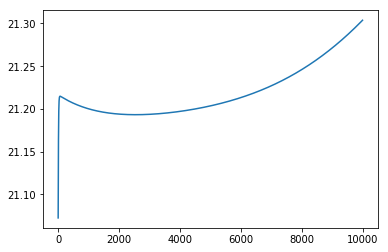

In [164]:
lr.showgraph()

In [165]:
print(lr.score(X_test , y_test))
print(lr.score(X_train , y_train))

33.84615384615385
22.857142857142858


In [148]:
print(lr.score(X_test , y_test))
print(lr.score(X_train , y_train))

29.230769230769234
13.571428571428571


In [143]:
print(lr.score(X_test , y_test))
print(lr.score(X_train , y_train))

29.230769230769234
13.571428571428571


In [138]:
lr.theta0

array([[ 1.38974018,  1.77268295, -0.23321211, -0.54312515, -0.22086888,
         0.46581698]])

In [157]:
lr.theta0

array([[ 1.09786533,  0.4851967 , -0.19334406,  0.08270053,  0.37996742,
        -0.42543207]])

In [147]:
lr.theta0

array([[-0.47159884,  1.04399767, -0.16404769, -0.95788345,  0.31543623,
        -0.52235955]])